# Plots for JOSS

This notebook demonstrates constructs the figures used in the JOSS manuscript for the `RelativisticDynamics.jl` package.

In [1]:
using Revise
using RelativisticDynamics

In [2]:
solution_e08,modele_08 = orbit(Norbits=20,a=0.998,Sθ=π/4.0, Sϕ = π/4.0,ι=π/2.0,e=0.8,α=30,mBH=4.3e6);
solution_e01,modele_01 = orbit(Norbits=20,a=0.998,Sθ=π/4.0, Sϕ = π/4.0,ι=π/2.0,e=0.1,α=30,mBH=4.3e6);

In [13]:
import Parameters: @unpack
using LaTeXStrings
using Plots 
"""
    StackedPlot(solution,model,savepath="")
Plot the x-y and x-z trajectory of a body on two separate subplots
"""
function StackedPlot(solution,model,savepath="")


    #Interpolate to higher resolution for smooth plotting   
    @unpack a = model.parameters    #Get the BH spin parameter 

    interpolation_factor = 10 
    T = range(first(solution.t),last(solution.t),length=length(solution.t)*interpolation_factor)
    p = solution(T)

    # Extract relevant data from the interpolated solution 
    r = p[2,:]
    θ = p[3,:] 
    ϕ = p[4,:]

    # Boyer lindquist to Cartesian 
    w = sqrt.(r.^2 .+ a^2) 
    x = w .* sin.(θ) .* cos.(ϕ)
    y = w .* sin.(θ) .* sin.(ϕ)
    z = r .* cos.(θ)
    

    #Convert to km in the z-direction
    mBH = model.parameters.mBH
    c   = model.constants.light_c
    μ   = model.constants.μ
   
    factor = mBH*μ/c^2
    z_km = z * factor/1e3


    #x-y 
    plot(x,y,layout=grid(2,1, heights=(0.8,0.2)), size=(450,600),legend=false,link = :x)
    plot!(ylabel=L"y (r_h)",subplot=1)



    xBH = 0:0; yBH = 0:0
    plt = scatter!(xBH, yBH,markercolor="red",markersize=5,subplot=1)

    #x-z
    plot!(x,z_km,subplot=2,legend=false)
    plot!(xlabel=L"x \rm (r_h)",subplot=2)
    plot!(ylabel=L"z (km)",subplot=2)


    display(plt)
    if ~isempty(savepath)
        println("Saving figure to: ", savepath)
        savefig(savepath)
    end



end;

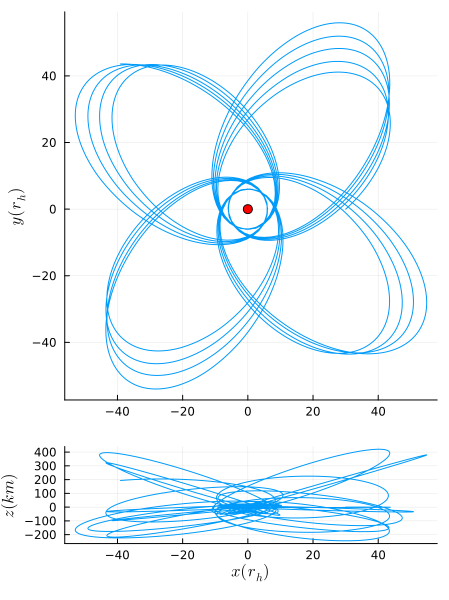

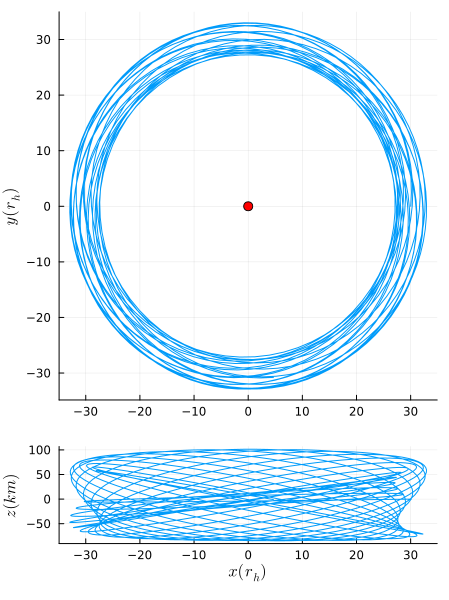

Saving figure to: ../example_media/e08_stacked.pdf
Saving figure to: 

../example_media/e01_stacked.pdf


In [14]:
StackedPlot(solution_e08,modele_08,"../example_media/e08_stacked.pdf");
StackedPlot(solution_e01,modele_01,"../example_media/e01_stacked.pdf");

